In [465]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

input_folder = 'C:/Users/Davide/workspace/SoccerData/Input/'
output_folder = 'C:/Users/Davide/workspace/SoccerData/Output/'

In [466]:
df = pd.read_csv(input_folder + 'dataset.csv', index_col=0)
players = pd.read_json(input_folder + 'players.json')

In [467]:
players.role = [i['code2'] for i in players.role]
df = df.merge(players[['role', 'wyId']], left_on='playerId', right_on='wyId', how='outer')

In [468]:
df.angle_mean.fillna(df.angle_mean.mean(), inplace=True)
df.angle_std.fillna(0, inplace=True)
df.height.fillna(df.height.mean(), inplace=True)
df.weight.fillna(df.weight.mean(), inplace=True)
df.ambidestro.fillna(df.ambidestro.mean(), inplace=True)
df = df.fillna(0)
df = df[df.role=='DF']
df = df.drop(['matchPeriod', 'matchId', 'role',  'wyId'], axis=1)


In [469]:
scaler = MinMaxScaler()
cols = ['standard_deviation', 'posizione_media_x', 'posizione_media_y',
        'angle_mean', 'angle_std', 'height', 'weight', 'yellow_card',
        'tempo_medio_tra_eventi','total_distance']
df_sc = scaler.fit_transform(df[cols])
df = pd.concat((pd.DataFrame(df_sc, columns=cols, index=df.index), 
                 df.drop(['posizione_media_x', 'posizione_media_y', 'standard_deviation',
                           'angle_mean', 'angle_std', 'height', 'weight', 'yellow_card',
                           'tempo_medio_tra_eventi','total_distance'], axis=1)
                 ), axis=1)

In [470]:
wyId = [21001.0, 248950.0, 20495.0,
        70084.0, 25849.0, 135903.0,
       20459.0, 3300.0, 3431.0,
        130.0, 288663.0, 263432.0,
        20461.0, 92966.0, 22883.0,
        37732.0, 20438.0, 625.0,
        40726.0, 7965.0, 14903,
       20443, 3543, 21315,
       285109, 3318, 20879, 265865,
       21171, 114, 286223,
       20845, 22566, 20935,
       116269, 190167,
       3484, 21025, 21169,
       213948, 21123, 15524,
       3313, 14812, 447804,
       11063, 21077, 105334, 21385,
       89186, 20479, 122,
       206314, 3323,
       14943, 8327, 22933]

#temp = df[df.playerId.isin(wyId)]
#print temp.shape
#temp.head()

In [471]:
col = ['00', '01', '02', '03',
       '04', '10', '11', '12', '13', '14', '20', '21', '22', '23', '24', '30',
       '31', '32', '33', '34', '40', '41', '42', '43', '44']

def dropout(row):
    ix = row.values.argsort()[-3:][::-1]
    row.iloc[[i for i in range(len(row)) if i not in ix]] =0
    return row


res = [dropout(i[col]) for n,i in df.drop('playerId',1).iterrows()]
df[col] = pd.DataFrame(res, index= df.index)


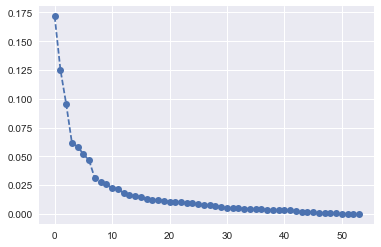

In [472]:
n = 54
pca = PCA(n_components=n)
pca.fit(df.drop('playerId', axis=1))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_,'--o')

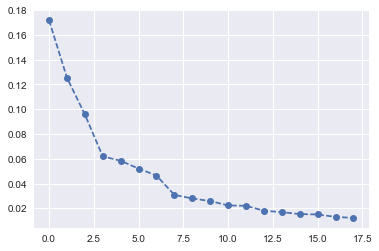

In [473]:
n = 18
pca = PCA(n_components=n)
pca.fit(df.drop('playerId', axis=1))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_,'--o')

In [474]:
sum(pca.explained_variance_ratio_)

0.8309739900988211

In [476]:
df1 = pd.DataFrame(pca.transform(df.drop('playerId', axis=1)), columns=['c_%d' % i for i in range(n)])
df1['playerId'] = df.playerId.values

In [477]:
# from sklearn.decomposition import KernelPCA

# ica = KernelPCA(n_components = n, kernel= 'rbf')
# ica.fit(df.drop('playerId', axis=1))

# df1 = pd.DataFrame(ica.transform(df.drop('playerId', axis=1)), columns=['c_%d' % i for i in range(n)])
# df1['playerId'] = df.playerId.values

In [478]:
df1.head()


,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,playerId
0,0.597250,0.361983,-0.166365,0.601066,-0.053144,0.349576,-0.111758,0.136705,0.502971,0.151505,-0.060602,-0.131800,0.756923,0.267123,0.052938,-0.260068,0.130846,0.161993,8306.0
1,0.629915,0.386172,-0.154723,0.662190,-0.083977,0.478116,-0.189432,0.522354,0.245063,-0.029047,0.177686,-0.113140,-0.384606,-0.146983,-0.096738,0.073548,-0.111326,-0.180589,8306.0
2,0.650272,0.331307,-0.122558,0.485627,0.011898,0.374270,-0.042529,0.205717,-0.105634,-0.069652,-0.172234,-0.077443,0.408875,0.087009,-0.121728,-0.096346,0.037780,-0.060899,8306.0
3,0.466585,-0.001683,-0.197765,0.210134,-0.038089,-0.098650,0.231425,-0.094587,-0.014957,0.027025,-0.084727,-0.004923,-0.046781,0.076956,-0.144503,-0.057691,-0.053308,-0.155357,8306.0
4,0.677217,0.351675,-0.159409,0.625184,-0.155082,0.441568,-0.208363,0.615229,0.023635,0.067412,0.064004,0.085398,-0.468104,-0.096412,-0.151036,0.065478,-0.076951,-0.026251,8306.0


In [485]:
# centr = np.array([df1[df1.playerId.isin(wyId[i:3*(i+1)])].drop('playerId',1).mean().values for i in range(5)])

centr = np.array([df1[df1.playerId.isin(wyId[i:3*(i+1)])].drop('playerId',1).mean().values for i in range(5)])

centr.shape

lab_str = ['DFB', 'AFB', 'BPD','SWL','STP']

In [480]:
# from sklearn.mixture import GaussianMixture

# kmeans = GaussianMixture(n_components=5, covariance_type='tied').fit(df1.drop('playerId', axis=1))

In [481]:
# df1['target'] = kmeans.predict(df1.drop('playerId', axis=1))


In [486]:
kmeans = KMeans(n_clusters=5, random_state=42,init=centr).fit(df1.drop('playerId', axis=1))
df1['target'] = [lab_str[i] for i in kmeans.labels_]

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:893: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [487]:
df1.target.value_counts()

BPD    1474
DFB    1328
SWL    1271
AFB    1178
STP    1076
Name: target, dtype: int64

In [488]:
def p(id):
    print(players[players.wyId==id].shortName)
    print(df1[df1.playerId==id].target.value_counts())
    print('-------')
    
for id in wyId[:15]:
    p(id)


307    E. Hysaj
Name: shortName, dtype: object
DFB    62
AFB     8
Name: target, dtype: int64
-------
215    Samir
Name: shortName, dtype: object
BPD    51
AFB     9
Name: target, dtype: int64
-------
243    M. Gobbi
Name: shortName, dtype: object
AFB    39
BPD     8
Name: target, dtype: int64
-------
61    Alex Sandro
Name: shortName, dtype: object
AFB    48
BPD     1
Name: target, dtype: int64
-------
447    F. Ghoulam
Name: shortName, dtype: object
AFB    21
BPD     1
Name: target, dtype: int64
-------
477    Jo\u00e3o Cancelo
Name: shortName, dtype: object
DFB    43
AFB     3
Name: target, dtype: int64
-------
235    L. Bonucci
Name: shortName, dtype: object
SWL    52
BPD    17
Name: target, dtype: int64
-------
218    Albiol
Name: shortName, dtype: object
STP    62
Name: target, dtype: int64
-------
261    Jo\u00e3o Miranda
Name: shortName, dtype: object
STP    61
Name: target, dtype: int64
-------
3    S. de Vrij
Name: shortName, dtype: object
BPD    46
SWL    24
Name: target, dt

In [462]:
x = df1.drop(['playerId'],1).values

In [491]:
from sklearn.manifold import TSNE


X_embedded = TSNE(n_components=2).fit_transform(x)

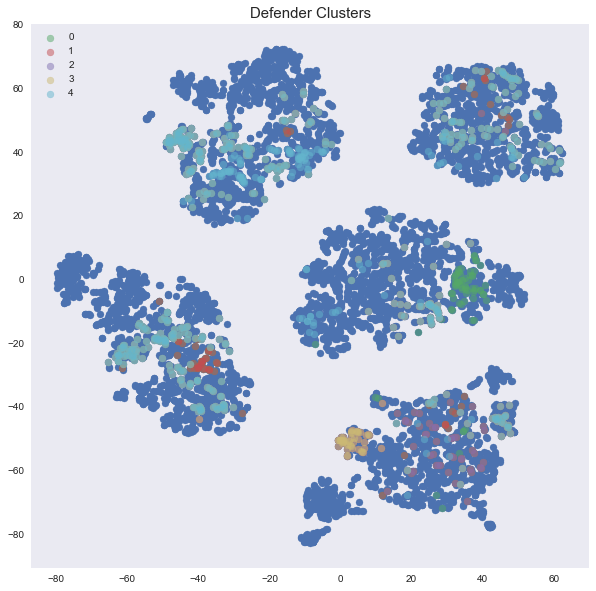

In [492]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))
plt.title('Defender Clusters', fontsize = 15)
plt.scatter(X_embedded[:,0],X_embedded[:,1])
for i in range(5):
    ix = df1.reset_index()[df1.playerId.isin(wyId[i:3*(i+1)])].index.values
    plt.scatter(X_embedded[ix,0],X_embedded[ix,1], label = str(i), alpha =0.5)
plt.legend(fontsize = 10)
plt.grid()

In [326]:
# fig.savefig(output_folder + 'dife.jpeg')

In [498]:
from sklearn.externals import joblib

joblib.dump(pca,output_folder + 'pca_df')
joblib.dump(kmeans,output_folder + 'kmeans_df')

['C:/Users/Davide/workspace/SoccerData/Output/kmeans_df']